### Script - Microdados da Educação Superior 2020

Importando as bibliotecas a serem utilizadas neste projeto. Primeiramente, importaremos as bibliotecas **pandas**, **matplotlib** e **os**. Em seguida, faremos a leitura do dataset.

**Introdução ao Pandas:** Pandas é uma biblioteca para Ciência de Dados de código aberto (open source), construída sobre a linguagem Python, e que providencia uma abordagem rápida e flexível, com estruturas robustas para se trabalhar com dados relacionais (ou rotulados), e tudo isso de maneira simples e intuitiva.

**Introdução ao Matplotlib:** Matplotlib é uma biblioteca compreensiva para criação de visualizações estáticas, animadas, e interativas em Python. Para mais informações sobre essa tecnologia, acesse a documentação MatPlotlib.

**Introdução ao OS:** Biblioteca de comandos do sistema operacional que irá auxiliar a fazer algumas operações dentro do computador.

In [137]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [138]:
ies_df = pd.read_csv((os.getcwd() + "/arquivosExcel/CADASTRO_IES_2020.CSV"),
                     encoding='ISO-8859-1', sep=';', low_memory=False)
# os.getcwd() para pegar o caminho do diretório atual
# encoding='ISO-8859-1' para não dar erro de encoding
# sep=';' para separar por ponto e vírgula
# low_memory=False para não dar erro de memória - não é recomendado para arquivos muito grandes

ies_df.head() # Exibindo as 5 primeiras linhas do dataframe para verificar se ocorreu tudo bem com a importação/leitura

# ies_df.columns.to_list() # Exibindo as colunas do dataframe

,NU_ANO_CENSO,NO_REGIAO_IES,CO_REGIAO_IES,NO_UF_IES,SG_UF_IES,CO_UF_IES,NO_MUNICIPIO_IES,CO_MUNICIPIO_IES,IN_CAPITAL_IES,NO_MESORREGIAO_IES,...,DOC_EX_60_MAIS,DOC_EX_BRANCA,DOC_EX_PRETA,DOC_EX_PARDA,DOC_EX_AMARELA,DOC_EX_INDÍGENA,DOC_EX_COR_ND,DOC_EX_BRA,DOC_EX_EST,DOC_EX_COM_DEFICIÊNCIA
0,2020,Norte,1,Rondônia,RO,11,Ariquemes,1100023,0,Leste Rondoniense,...,2,18,1,8,0,0,27,54,0,0
1,2020,Norte,1,Rondônia,RO,11,Ariquemes,1100023,0,Leste Rondoniense,...,3,45,5,17,2,0,0,67,2,0
2,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,9,114,2,31,2,0,3,152,0,0
3,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,1,30,1,4,0,0,4,39,0,0
4,2020,Norte,1,Rondônia,RO,11,Cacoal,1100049,0,Leste Rondoniense,...,0,14,0,7,0,0,18,39,0,0


Adicionando uma fonte customizada para gerar os gráficos com o objetivo de deixar mais bonito

In [139]:
from matplotlib import font_manager

diretorioFontes = os.getcwd() + "/fontesRelatorio"
arquivosFontes = font_manager.findSystemFonts(fontpaths=diretorioFontes)

for arquivo in arquivosFontes:
    font_manager.fontManager.addfont(arquivo)

Começando a fazer os gráficos, agrupando os dados de acordo com os funcionários inscritos por região, docentes de diferentes etnias, gêneros e portadores de deficiências.

Análise da Quantidade de Docentes por Região

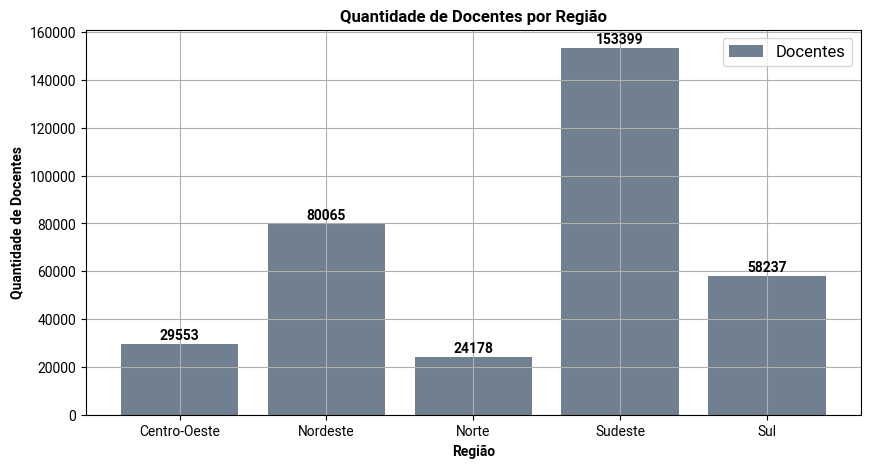

In [140]:

dataDocTotal = ies_df.groupby('NO_REGIAO_IES')['QT_TEC_TOTAL'].sum()

""" plt.plot(dataDocTotal.index, dataDocTotal.values, marker="o") # Plotando o gráfico de linhas """
plt.bar(dataDocTotal.index, dataDocTotal.values,
        color='slategrey')  # Plotando o gráfico de barras

# Alterando o estilo do gráfico
plt.rcParams['figure.figsize'] = (12, 7)  # Alterando o tamanho da figura (largura, altura)
plt.rcParams['font.family'] = 'Roboto'  # Alterando a fonte do gráfico

# Alterar o estilo das fontes (bold) para os títulos e legendas do gráfico
plt.rcParams['axes.labelweight'] = 'bold' # Alterando o peso da fonte do título do eixo X e Y
plt.rcParams['axes.titleweight'] = 'bold' # Alterando o peso da fonte do título do gráfico
plt.rcParams['legend.fontsize'] = 'large' # Alterando o tamanho da fonte da legendas

plt.title('Quantidade de Docentes por Região')  # Título do gráfico

plt.xlabel('Região')  # Legenda do eixo X
plt.ylabel('Quantidade de Docentes')  # Legenda do eixo Y

plt.grid(True)  # Exibindo as linhas de grade

plt.legend(['Docentes'])  # Exibindo a legenda (nome da linha) no gráfico

# Adicionando anotações no topo de cada barra
for i, j in zip(dataDocTotal.index, dataDocTotal.values):
    plt.annotate(
        str(j),
        xy=(i, j),
        xytext=(0, 1), # Deslocamento do texto
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontweight='bold',
        font = 'Roboto',
    )
    # xy=(i, j) é o ponto onde será exibido o valor
    # xytext=(0, 5) é o deslocamento do texto
    # textcoords='offset points' é o tipo de coordenada do texto
    # ha='center' é o alinhamento horizontal do texto
    # va='bottom' é o alinhamento vertical do texto
    # fontweight='bold' é o peso da fonte do texto
    # font = 'Roboto' é a fonte do texto

# Caminho para a pasta onde será salvo o gráfico
caminhoGrafico = os.path.join(
    os.getcwd() + '/arquivosGraficos', 'docentesPorRegiao.png')
plt.savefig(caminhoGrafico)  # Salvando o gráfico em uma imagem

plt.show()  # Exibindo o gráfico

Análise da Quantidade de Docentes Pretos por Região

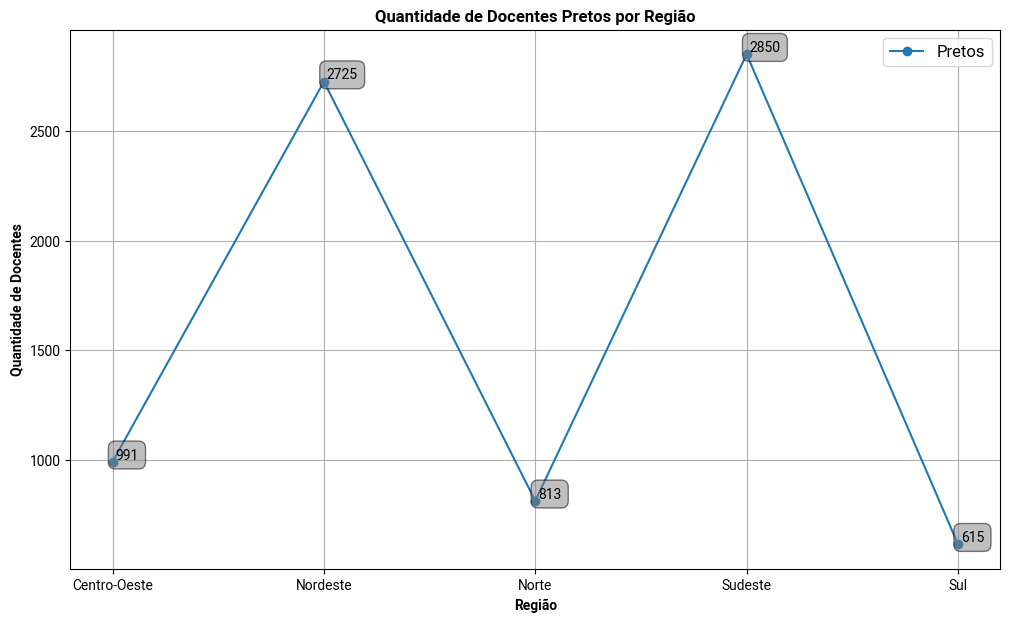

In [141]:
dataDocPretosTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_PRETA'].sum()

plt.plot(dataDocPretosTotal.index, dataDocPretosTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 5) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes Pretos por Região')

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.legend(['Pretos']) # Exibindo a legenda (nome da linha) no gráfico

# Mostrar o valor específico ao lado de cada ponto no gráfico
for i, j in zip(dataDocPretosTotal.index, dataDocPretosTotal.values):
  plt.annotate(str(j), xy=(i, j), xytext=(2, 2), textcoords='offset points', bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5))
  # xy=(i, j) é o ponto onde será exibido o valor
  # xytext=(2, 2) é o deslocamento do texto
  # textcoords='offset points' é o tipo de coordenada do texto
  # bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5) é o estilo da caixa do texto

caminhoGrafico = os.path.join(os.getcwd() + '/arquivosGraficos', 'docentesPretosPorRegiao.png') # Caminho para a pasta onde será salvo o gráfico
plt.savefig(caminhoGrafico) # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico

Análise da Quantidade de Docentes Brancos por Região

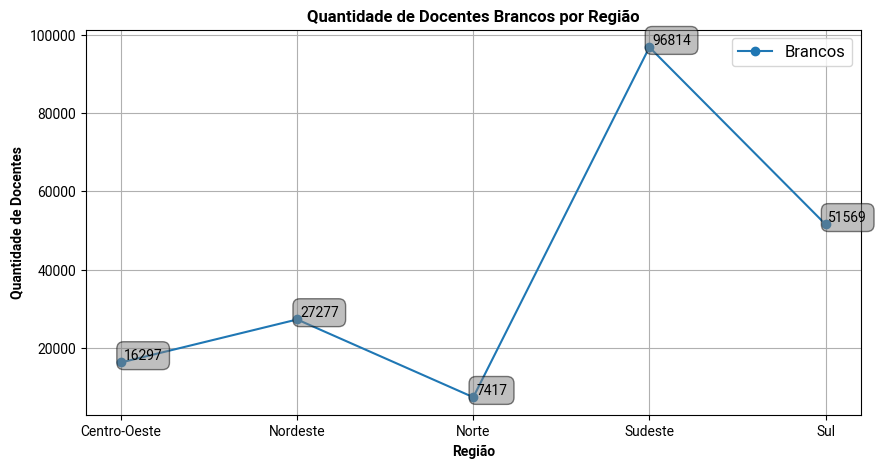

In [142]:
dataDocBrancosTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_BRANCA'].sum()

plt.plot(dataDocBrancosTotal.index, dataDocBrancosTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 6) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes Brancos por Região')

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.legend(['Brancos']) # Exibindo a legenda (nome da linha) no gráfico

# Mostrar o valor específico ao lado de cada ponto no gráfico
for i, j in zip(dataDocBrancosTotal.index, dataDocBrancosTotal.values):
  plt.annotate(str(j), xy=(i, j), xytext=(2, 2), textcoords='offset points', bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5))
  # xy=(i, j) é o ponto onde será exibido o valor
  # xytext=(2, 2) é o deslocamento do texto
  # textcoords='offset points' é o tipo de coordenada do texto
  # bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5) é o estilo da caixa do texto

caminhoGrafico = os.path.join(os.getcwd() + '/arquivosGraficos', 'docentesBrancosPorRegiao.png') # Caminho para a pasta onde será salvo o gráfico
plt.savefig(caminhoGrafico) # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico

Análise da Quantidade de Docentes Amarelos por Região

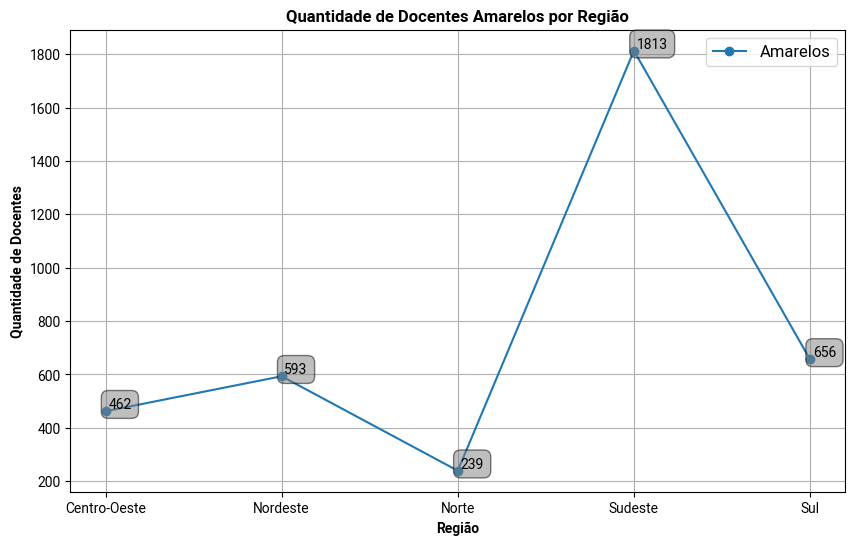

In [143]:
dataDocAmarelosTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_AMARELA'].sum()

plt.plot(dataDocAmarelosTotal.index, dataDocAmarelosTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 6) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes Amarelos por Região')

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.legend(['Amarelos']) # Exibindo a legenda (nome da linha) no gráfico

# Mostrar o valor específico ao lado de cada ponto no gráfico
for i, j in zip(dataDocAmarelosTotal.index, dataDocAmarelosTotal.values):
  plt.annotate(str(j), xy=(i, j), xytext=(2, 2), textcoords='offset points', bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5))
  # xy=(i, j) é o ponto onde será exibido o valor
  # xytext=(2, 2) é o deslocamento do texto
  # textcoords='offset points' é o tipo de coordenada do texto
  # bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5) é o estilo da caixa do texto

caminhoGrafico = os.path.join(os.getcwd() + '/arquivosGraficos', 'docentesAmarelosPorRegiao.png') # Caminho para a pasta onde será salvo o gráfico
plt.savefig(caminhoGrafico) # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico

Análise da Quantidade de Docentes Indígenas por Região

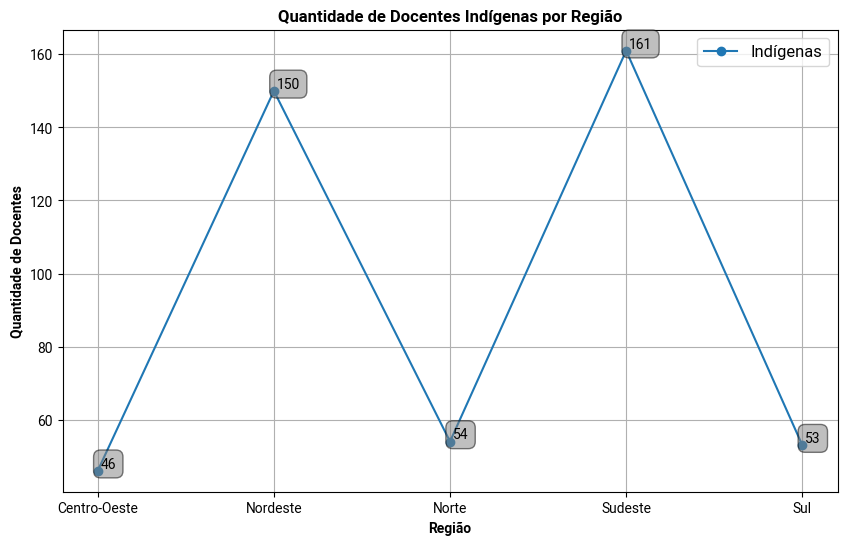

In [144]:
dataDocIndigenasTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_INDÍGENA'].sum()

plt.plot(dataDocIndigenasTotal.index, dataDocIndigenasTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 5) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes Indígenas por Região')

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.legend(['Indígenas']) # Exibindo a legenda (nome da linha) no gráfico

# Mostrar o valor específico ao lado de cada ponto no gráfico
for i, j in zip(dataDocIndigenasTotal.index, dataDocIndigenasTotal.values):
  plt.annotate(str(j), xy=(i, j), xytext=(2, 2), textcoords='offset points', bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5))
  # xy=(i, j) é o ponto onde será exibido o valor
  # xytext=(2, 2) é o deslocamento do texto
  # textcoords='offset points' é o tipo de coordenada do texto
  # bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5) é o estilo da caixa do texto

caminhoGrafico = os.path.join(os.getcwd() + '/arquivosGraficos', 'docentesIndigenasPorRegiao.png') # Caminho para a pasta onde será salvo o gráfico
plt.savefig(caminhoGrafico) # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico

Análise da Quantidade de Docentes com Deficiência (PCD) por Região

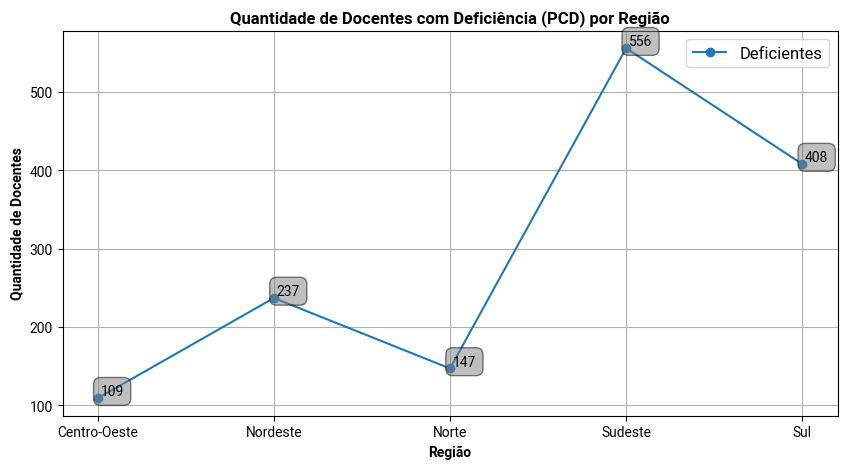

In [145]:
dataDocDeficientesTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_COM_DEFICIÊNCIA'].sum()

plt.plot(dataDocDeficientesTotal.index, dataDocDeficientesTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 5) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes com Deficiência (PCD) por Região')

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.legend(['Deficientes']) # Exibindo a legenda (nome da linha) no gráfico

# Mostrar o valor específico ao lado de cada ponto no gráfico
for i, j in zip(dataDocDeficientesTotal.index, dataDocDeficientesTotal.values):
  plt.annotate(str(j), xy=(i, j), xytext=(2, 2), textcoords='offset points', bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5))
  # xy=(i, j) é o ponto onde será exibido o valor
  # xytext=(2, 2) é o deslocamento do texto
  # textcoords='offset points' é o tipo de coordenada do texto
  # bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5) é o estilo da caixa do texto

caminhoGrafico = os.path.join(os.getcwd() + '/arquivosGraficos', 'docentesDeficientesPorRegiao.png') # Caminho para a pasta onde será salvo o gráfico
plt.savefig(caminhoGrafico) # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico

Análise da Quantidade de Docentes Mulheres por Região

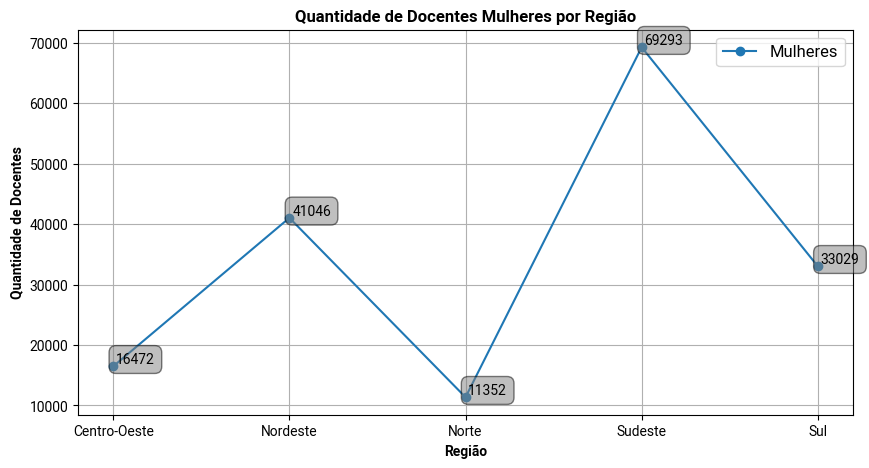

In [146]:
dataDocMulheresTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_FEMI'].sum()

plt.plot(dataDocMulheresTotal.index, dataDocMulheresTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 5) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes Mulheres por Região')

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.legend(['Mulheres']) # Exibindo a legenda (nome da linha) no gráfico

# Mostrar o valor específico ao lado de cada ponto no gráfico
for i, j in zip(dataDocMulheresTotal.index, dataDocMulheresTotal.values):
  plt.annotate(str(j), xy=(i, j), xytext=(2, 2), textcoords='offset points', bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5))
  # xy=(i, j) é o ponto onde será exibido o valor
  # xytext=(2, 2) é o deslocamento do texto
  # textcoords='offset points' é o tipo de coordenada do texto
  # bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5) é o estilo da caixa do texto

caminhoGrafico = os.path.join(os.getcwd() + '/arquivosGraficos', 'docentesMulheresPorRegiao.png') # Caminho para a pasta onde será salvo o gráfico
plt.savefig(caminhoGrafico) # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico

Análise da Quantidade de Docentes Homens por Região

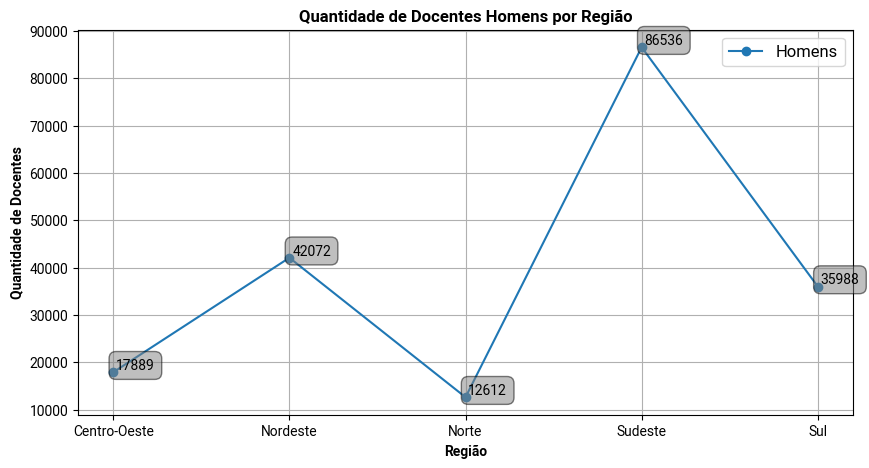

In [147]:
dataDocHomensTotal = ies_df.groupby('NO_REGIAO_IES')['DOC_EX_MASC'].sum()

plt.plot(dataDocHomensTotal.index, dataDocHomensTotal.values, marker="o") # Plotando o gráfico de linhas

plt.rcParams['figure.figsize'] = (10, 5) # Alterando o tamanho da figura

plt.title('Quantidade de Docentes Homens por Região')

plt.xlabel('Região') # Legenda do eixo X
plt.ylabel('Quantidade de Docentes') # Legenda do eixo Y

plt.grid(True) # Exibindo as linhas de grade

plt.legend(['Homens']) # Exibindo a legenda (nome da linha) no gráfico

# Mostrar o valor específico ao lado de cada ponto no gráfico
for i, j in zip(dataDocHomensTotal.index, dataDocHomensTotal.values):
  plt.annotate(str(j), xy=(i, j), xytext=(2, 2), textcoords='offset points', bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5))
  # xy=(i, j) é o ponto onde será exibido o valor
  # xytext=(2, 2) é o deslocamento do texto
  # textcoords='offset points' é o tipo de coordenada do texto
  # bbox=dict(boxstyle='round, pad=0.5', fc='gray', alpha=0.5) é o estilo da caixa do texto

caminhoGrafico = os.path.join(os.getcwd() + '/arquivosGraficos', 'docentesHomensPorRegiao.png') # Caminho para a pasta onde será salvo o gráfico
plt.savefig(caminhoGrafico) # Salvando o gráfico em uma imagem

plt.show() # Exibindo o gráfico

In [ ]:
from fpdf import FPDF
import os

# Caminho para a pasta de fontes
diretorioFontes = os.path.join(os.getcwd(), "fontesRelatorio")

# Função para criar um novo parágrafo
def novoParagrafo(pdf, texto, fonte, tamanhoFonte, alinhamento):
    pdf.add_font("Roboto", '', fonte, uni=True)  # Adicionando a fonte
    pdf.set_font("Roboto", '', tamanhoFonte)  # Definindo a fonte e o tamanho
    pdf.multi_cell(0, 10, "", 0, "C")
    pdf.multi_cell(0, 10, texto, 0, "C")
    pdf.ln(alinhamento)  # Definindo o alinhamento

# Criando o objeto PDF
pdf = FPDF()

# Adicionando uma página
pdf.add_page()

# Adicionando as fontes
pdf.add_font("Roboto", "R", os.path.join(
    diretorioFontes, "Roboto-Regular.ttf"), uni=True)
pdf.add_font("Roboto", "B", os.path.join(
    diretorioFontes, "Roboto-Bold.ttf"), uni=True)
pdf.add_font("Roboto", "I", os.path.join(
    diretorioFontes, "Roboto-Italic.ttf"), uni=True)
pdf.add_font("Roboto", "BI", os.path.join(
    diretorioFontes, "Roboto-BoldItalic.ttf"), uni=True)
pdf.add_font("Roboto", "L", os.path.join(
    diretorioFontes, "Roboto-Light.ttf"), uni=True)
pdf.add_font("Roboto", "LI", os.path.join(
    diretorioFontes, "Roboto-LightItalic.ttf"), uni=True)
pdf.add_font("Roboto", "M", os.path.join(
    diretorioFontes, "Roboto-Medium.ttf"), uni=True)
pdf.add_font("Roboto", "MI", os.path.join(
    diretorioFontes, "Roboto-MediumItalic.ttf"), uni=True)

# Título do relatório
pdf.set_font("Roboto", "B", 20)
pdf.cell(0, 20, "Relatório — Kick", align="C", ln=True)
pdf.ln(80)

# Subtítulo do relatório
pdf.set_font("Roboto", "B", 30)
pdf.cell(0, 20, "Desigualdade na Educação do Brasil", align="C", ln=True)

# Integrante do relatório
pdf.set_font("Roboto", "M", 15)
pdf.cell(0, 20, "Projeto desenvolvido por: Luan Menezes de Matos Luiz", align="C")
pdf.ln(70)

# Adicionando um pequeno texto de introdução na capa do relatório
pdf.set_font("Roboto", "R", 15)
textoIntroducao = (
    "Este relatório tem como objetivo apresentar os dados obtidos a partir da análise dos dados "
    "do Censo da Educação Superior de 2020, disponibilizados pelo INEP (Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira)."
)
pdf.multi_cell(0, 10, textoIntroducao, 0, "C")

# Adicionando uma nova página
pdf.add_page()

# Título da página
pdf.ln(20)
pdf.set_font("Roboto", "B", 25)
pdf.cell(0, 20, "Sumário", align="C", ln=True)
pdf.ln(20)

pdf.set_font("Roboto", "R", 15)

# Função para gerar pontos especificando a quantidade


def gerarPontos(quantidade):
    pontos = ""
    for i in range(quantidade):
        pontos += "."
    return pontos


def adicionarTextoComPontos(texto, quantidadePontos):
    textoComPontos = f"{texto} {gerarPontos(quantidadePontos)}"
    pdf.cell(0, 10, textoComPontos, align="L")


pdf.set_xy(10, pdf.get_y())
adicionarTextoComPontos("1. Introdução", 110)

pdf.set_xy(10, pdf.get_y() + 10)
adicionarTextoComPontos("2. Docentes por Região", 93)

pdf.set_xy(10, pdf.get_y() + 10)
adicionarTextoComPontos("3. Docentes Pretos por Região", 81)

pdf.set_xy(10, pdf.get_y() + 10)
adicionarTextoComPontos("4. Docentes Brancos por Região", 78)

pdf.set_xy(10, pdf.get_y() + 10)
adicionarTextoComPontos("5. Docentes Amarelos por Região", 76)

pdf.set_xy(10, pdf.get_y() + 10)
adicionarTextoComPontos("6. Docentes Indígenas por Região", 76)

pdf.set_xy(10, pdf.get_y() + 10)
adicionarTextoComPontos("7. Docentes com Deficiência (PCD) por Região", 54)

pdf.set_xy(10, pdf.get_y() + 10)
adicionarTextoComPontos("8. Docentes Mulheres por Região", 76)

pdf.set_xy(10, pdf.get_y() + 10)
adicionarTextoComPontos("9. Docentes Homens por Região", 78)

# Adicionando uma nova página
pdf.add_page()

# Título da página
pdf.ln(20)
pdf.set_font("Roboto", "B", 20)
pdf.cell(0, 20, "1. Introdução", align="C", ln=True)
pdf.ln(20)

# Texto da introdução
textoIntroducao = (
    "A educação é um dos pilares mais importantes para o desenvolvimento de um país. "
    "É através dela que as pessoas adquirem conhecimento e aprendem a pensar criticamente, "
    "o que é essencial para a formação de cidadãos conscientes e capazes de contribuir para a sociedade. "
    "Porém, a educação no Brasil ainda é muito desigual, principalmente quando se trata de raça e gênero. "
    "De acordo com o Censo da Educação Superior de 2020, apenas 2,2% dos docentes são pretos, "
    "enquanto 55,5% são brancos. Além disso, 57,5% dos docentes são mulheres, enquanto apenas 42,5% são homens. "
    "Esses dados mostram que ainda há muito a ser feito para que a educação no Brasil seja mais igualitária."
)
pdf.set_font("Roboto", "R", 15)
pdf.multi_cell(0, 10, textoIntroducao, 0, "C")

# Adicionando uma imagem na página de introdução e centralizando ao meio
pdf.ln(20)
# pdf.image(os.path.join(os.getcwd() + '/imagensRelatorio', 'desigualdadeEducacao.png'), x=None, y=None, w=pdf.w - 100, h=0)
pdf.image(os.path.join(os.getcwd() + '/imagensRelatorio',
          'desigualdadeEducacao.png'), x=50, y=pdf.get_y() + 20, w=100)

# Array dos nomes e imagens dos gráficos das seções
nomesArray = [
    "Docentes por Região",
    "Docentes Pretos por Região",
    "Docentes Brancos por Região",
    "Docentes Amarelos por Região",
    "Docentes Indígenas por Região",
    "Docentes com Deficiência (PCD) por Região",
    "Docentes Mulheres por Região",
    "Docentes Homens por Região"
]
imagensArray = [
    "docentesPorRegiao.png",
    "docentesPretosPorRegiao.png",
    "docentesBrancosPorRegiao.png",
    "docentesAmarelosPorRegiao.png",
    "docentesIndigenasPorRegiao.png",
    "docentesDeficientesPorRegiao.png",
    "docentesMulheresPorRegiao.png",
    "docentesHomensPorRegiao.png"
]

for i, (nome, imagem) in enumerate(zip(nomesArray, imagensArray), start=2):
    # Adicionando uma nova página
    pdf.add_page()

    # Criando o ome da página com o número
    nomeComNumero = f"{i}. {nome}"

    pdf.set_font("Roboto", "B", 20)
    pdf.ln(20)
    pdf.cell(0, 20, nome, align="C", ln=True)

    # Adicionando uma imagem na página de docentes por região e centralizando ao meio
    pdf.ln(20)
    pdf.image(os.path.join(os.getcwd() + '/arquivosGraficos',
              imagem), x=None, y=None, w=pdf.w - 20, h=0)

    # Pulando um espaço para o texto
    pdf.ln(20)

    # Texto da seção
    textoDocentesRegiao = (
        f"O gráfico acima mostra a quantidade de {nome} por região do Brasil. "
        "É possível observar que a região Sudeste possui a maior quantidade de docentes, "
        "enquanto a região Norte possui a menor quantidade."
    )

    pdf.set_font("Roboto", "R", 15)
    pdf.multi_cell(0, 10, textoDocentesRegiao, 0, "C")

# Salvar o PDF em um arquivo
pdf.output(os.path.join(os.getcwd(), "relatorio.pdf"))

print("Relatório gerado com sucesso!")

Relatório gerado com sucesso!
